In [2]:
import numpy as np

We can generate a random number from a normal distribution with mean 20 and standard deviation 30. If you evaluate this several times, it will generate a different random number each time.

In [3]:
np.random.normal(20, 30)

-4.265365614695405

In [4]:
np.random.normal(20, 30)

49.907978103113834

We can generate an **array** of random numbers by passing a third argument to the `np.random.normal` function, saying how many random numbers we want. We store the array in a *variable* named `obs`.

In [5]:
obs = np.random.normal(20, 30, 10)
obs

array([-19.0764012 ,  38.63377998, -14.33790982,  -1.74662953,
        -8.21202361,  61.48342808,  30.86632804,  56.89928289,
        30.11108028,  75.33349454])

The builtin function `len` in Python tells us the length of an array or a list.

In [6]:
len(obs)

10

We can do arithmetic on arrays, adding them together or subtracting a constant from each element.

In [7]:
obs + obs

array([-38.15280239,  77.26755996, -28.67581964,  -3.49325907,
       -16.42404722, 122.96685617,  61.73265608, 113.79856578,
        60.22216055, 150.66698908])

In [8]:
obs - 25

array([-44.0764012 ,  13.63377998, -39.33790982, -26.74662953,
       -33.21202361,  36.48342808,   5.86632804,  31.89928289,
         5.11108028,  50.33349454])

In [10]:
(obs - 20)/30

array([-1.30254671,  0.621126  , -1.14459699, -0.72488765, -0.94040079,
        1.38278094,  0.36221093,  1.2299761 ,  0.33703601,  1.84444982])

We can apply a numpy function to all the elements of an array. 

The array has *methods*, a kind of function that acts on the array.

In [12]:
obs.mean()

24.99544296571495

In [13]:
obs.sum()

249.9544296571495

In [14]:
obs.min()

-19.076401195010625

There are similar functions in the `numpy` library that take an array as argument:

In [15]:
np.mean(obs)

24.99544296571495

In [16]:
np.sum(obs)

249.9544296571495

In [17]:
np.min(obs)

-19.076401195010625

In [18]:
# Generating data from binomial(10, 0.5) distribution
np.random.binomial(10, 0.5)

3

## Simple plotting

The matplotlib library allows you to generate many types of plots and statistical graphs in a convenient way. The [online gallery](https://matplotlib.org/gallery.html) shows the variety of plots available, and the [documentation](https://matplotlib.org/contents.html) is also available online. We import the `pyplot` component of matplotlib and give it an alias `plt`. 

In [19]:
import matplotlib.pyplot as plt
plt.style.use("bmh")  # this affects the style (colors etc.) of plots
%config InlineBackend.figure_formats=["svg"]

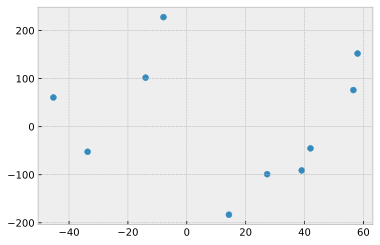

In [20]:
X = np.random.normal(20, 30, 10)
Y = np.random.normal(50, 100, 10)
plt.scatter(X, Y);

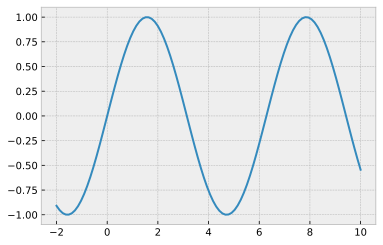

In [23]:
x = np.linspace(-2, 10, 100)
plt.plot(x, np.sin(x));

We can add two vectors together, assuming that all their dimensions are identical. Our array $x$ has one dimension of size 100. We can add another random vector of size 100 to it, containing numbers drawn from a uniform probability distribution between -0.1 and 0.1 (these represent some random “noise” which is added to our sine curve).

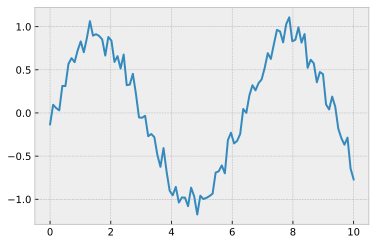

In [24]:
x = np.linspace(0, 10, 100)
obs = np.sin(x) + np.random.normal(-0.1, 0.1, 100)
plt.plot(x, obs);

The **central limit theorem** states that the sum of a number of independent random variables tends toward a normal distribution even if the original variables themselves are not normally distributed. We illustrate this result by examining the distribution of the sums of 1000 realizations of a uniformly distributed random variable, plotting the distribution as a histogram. 

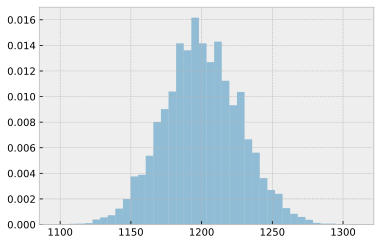

In [27]:
N = 10_000
sim = np.zeros(N)
for i in range(N):
    sim[i] = np.random.binomial(30, 0.4, 100).sum()
plt.hist(sim, bins=40, alpha=0.5, density=True);

# Coins and dice

We start by importing a number of Python libraries and setting up some configuration settings. 

In [28]:
%matplotlib inline

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# plt.style.use("bmh")
# %config InlineBackend.figure_formats=["svg"]
# numpy.set_printoptions(threshold=20)

When undertaking statistical analyses, it can be important for your results to be *reproducible*, meaning that you obtain the same results each time you run the analysis. The pseudorandom number generator used by NumPy generates long sequences of outputs that are fully determined by the *seed* of the generator (if you use the same seed, you will obtain the same results each time you run the notebook). In default setting, the seed is taken from some unpredictable feature of the computer environment (such as the `/dev/random` device on a Linux/Unix computer), so sucessive runs will generate different results. If you want a reproducible notebook, you can set the random seed explicitly. 

In [29]:
np.random.seed(42)

Let’s **simulate a coin toss** by a random choice between the numbers 0 and 1 (say 0 represents tails and 1 represents heads). Note that the second argument to `randint` is an *exclusive* upper bound.

In [30]:
np.random.randint(0, 2)

0

Let’s toss two coins, which gives as an array with the result of the first and second toss.

In [31]:
np.random.randint(0, 2, 2)

array([1, 0])

The number of heads when tossing a coin twice is simply the sum of that array.

In [32]:
np.random.randint(0, 2, 2).sum()

0

**Task**: simulate the *number of heads when tossing a coin twice*. Do this 1000 times, calculate the expected value of the number of heads, and plot the distribution of results (the Probability Mass Function).

In [34]:
N = 100
heads = np.zeros(N, dtype=int)
for i in range(N):
    heads[i] = np.random.randint(0, 2, 2).sum()
heads

array([1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0])

The **expected value** (or mathematical expectation) of the number of heads is simply the mean of our observations (it’s what happens “on average”). 

In [39]:
heads.mean()

0.92

Now let’s look at the **distribution** of the number of heads obtained. Let’s count how many times we have scored 0, 1 or 2 in our 100 simulations, using the `unique` function from `numpy`, then plot that probability mass function. 

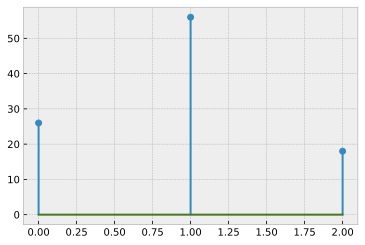

In [40]:
values, counts = np.unique(heads, return_counts=True)
plt.stem(values, counts, use_line_collection=True)
plt.show()

The SymPy library, which adds symbolic mathematics capabilities to Python, has functionality that allows us to calculate the expected number of heads and the probability distribution **analytically**.

In [41]:
import sympy.stats
from sympy.interactive import printing
# printing.init_printing(use_latex="mathjax")

toss1 = sympy.stats.Bernoulli("toss1", p=0.5)
toss2 = sympy.stats.Bernoulli("toss2", p=0.5)
sympy.stats.E(toss1 + toss2)

1.00000000000000

So the **expected value** of the number of heads is 1 (the numerical approximation we estimated using our simulation above was very close to that). Now let’s examine the **probability distribution**. 

In [42]:
sympy.stats.density(toss1 + toss2)

{0: 0.250000000000000, 1: 0.500000000000000, 2: 0.250000000000000}

## Expected value of a dice roll

The expected value of a dice roll is 

$$\sum_{i=1}^6 i \times \frac{1}{6} = 3.5$$

That means that if we toss a dice a large number of times, the mean value should converge to 3.5. Let’s check that empirically by running a simulation in Python.

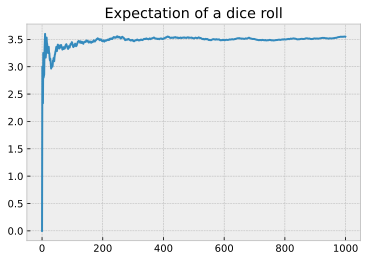

In [43]:
N = 1000
roll = np.zeros(N, dtype=int)
expectation = np.zeros(N)
for i in range(N):
    roll[i] = np.random.randint(1, 7)
for i in range(1, N):
    expectation[i] = np.mean(roll[0:i])
plt.plot(expectation)
plt.title("Expectation of a dice roll")
plt.show()

The sympy.stats module has functionality that allows us to evaluate the expected value analytically. 

In [44]:
D = sympy.stats.Die("D", 6)
sympy.stats.E(D)

7/2

## Simulating dice throws

In [47]:
dice = scipy.stats.randint(1, 7)

What is the probability of a die rolling 4?

In [46]:
dice.pmf(4)

0.16666666666666666

What is the probability of rolling 4 or below?

In [48]:
dice.cdf(4)

0.6666666666666666

What is the probability of rolling between 2 and 4 (inclusive)?

In [49]:
dice.cdf(4) - dice.cdf(1)

0.5

Now let’s look at what happens when we roll **three dice**. We’ll estimate the expected value and the probability mass function for the sum of three dice.  

In [50]:
N = 10_000
roll = np.zeros(N, dtype=int)
for i in range(N):
    roll[i] = scipy.stats.randint(1, 7).rvs(3).sum()
roll.mean()

10.5042

We can plot the probability mass function for the sum of three dice:

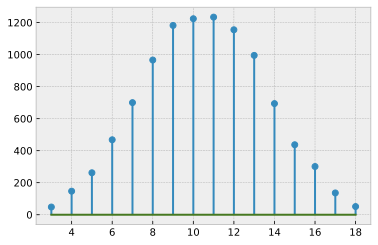

In [51]:
values, counts = np.unique(roll, return_counts=True)
plt.stem(values, counts, use_line_collection=True)
plt.show()

## Pepys and Newton

Samuel Pepys was a great diarist of the English language and a friend of Isaac Newton’s. Pepys was a gambler and [wrote to Newton](https://en.wikipedia.org/wiki/Newton%E2%80%93Pepys_problem) to ask which of three events is the most likely:

1. at least one six comes up when six fair dice are rolled;
2. at least two sixes come up when 12 dice are rolled;
3. at least three sixes come up when 18 dice are rolled.

Now Newton wasn’t able to use Python, and spent a while working out the answers, but we can [stand on the shoulders of giants](https://en.wikipedia.org/wiki/Standing_on_the_shoulders_of_giants) and figure this out quite easily.  

**Possibility 1**: the probability of rolling at least one six is 1 minus the probability of zero sixes, which is

In [52]:
1 - (5/6.0)**6

0.6651020233196159

**Possibility 2**: the probability of at least two sixes is 1 minus the probability of zero sixes, minus the probability of a single six. The probability of zero sixes is easy to calculate; here are three ways of calculating it.

In [53]:
# throw a non-6 12 times
(5/6.0)**12

0.11215665478461515

The probability of rolling a single six can likewise be determined using the binomial distribution.

In [54]:
scipy.stats.binom(12, 1/6.0).pmf(1)

0.2691759714830762

so the final answer is

In [55]:
roll12 = scipy.stats.binom(12, 1/6.0)
1 - roll12.pmf(0) - roll12.pmf(1)

0.6186673737323087

**Possibility 3**: in the same way, the probability of at least three sixes when rolling 18 dice is one minus the probability of zero sixes, minus the probability of one six, minus the probability of two sixes.

In [56]:
roll18 = scipy.stats.binom(18, 1/6.0)
1 - roll18.pmf(0) - roll18.pmf(1) - roll18.pmf(2)

0.5973456859477231

In [57]:
1 - roll18.cdf(2)

0.5973456859477229

Conclusion: it’s best to bet on possibility 1.